<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/_3soft_computing_pso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import math

# Define the objective function
def objective_function(x):
    if x <= 0:
        return float('inf')  # Return a large value for negative x
    else:
        return x**3 + math.sqrt(x) - 1

# Define the PSO algorithm
def pso_algorithm(num_particles, dimensions, max_iter):
    # Initialize the particles and their velocities
    particles = [[random.uniform(0.1, 5.0) for _ in range(dimensions)] for _ in range(num_particles)]
    velocities = [[0.0 for _ in range(dimensions)] for _ in range(num_particles)]

    # Initialize the global best position and value
    global_best_position = particles[0]
    global_best_value = float('inf')

    # Iterate through the specified number of iterations
    for _ in range(max_iter):
        # Update each particle's position and velocity
        for i in range(num_particles):
            particle = particles[i]
            velocity = velocities[i]

            # Update the velocity
            new_velocity = [0.5 * v + 2.0 * random.random() * (gbp - p) + 2.0 * random.random() * (lbp - p) for v, p, gbp, lbp in zip(velocity, particle, global_best_position, particles[random.randint(0, num_particles-1)])]
            velocities[i] = new_velocity

            # Update the position
            new_position = [p + v for p, v in zip(particle, new_velocity)]
            particles[i] = new_position

            # Update the global best position and value
            value = objective_function(new_position[0])
            if value < global_best_value:
                global_best_value = value
                global_best_position = new_position

    return global_best_position[0]

# Set the parameters for the PSO algorithm
num_particles = 5
dimensions = 1
max_iter = 100

# Run the PSO algorithm
best_position = pso_algorithm(num_particles, dimensions, max_iter)

print("The minimum value of the function occurs at x =", best_position)
print("The minimum function value is", objective_function(best_position))

The minimum value of the function occurs at x = 0.2574410917776113
The minimum function value is -0.47555132495614494


In [ ]:
import random
import math

# Define the objective function
def objective_function(x):
    if x <= 0:
        return float('inf')  # Return a large value for negative x
    else:
        return x**3 + math.sqrt(x) - 1

# Define the PSO algorithm
def pso_algorithm(num_particles, dimensions, max_iter):
    # Initialize the particles and their velocities
    particles = [[random.uniform(0.1, 5.0) for _ in range(dimensions)] for _ in range(num_particles)]
    velocities = [[0.0 for _ in range(dimensions)] for _ in range(num_particles)]

    # Initialize the global best position and value
    global_best_position = particles[0]
    global_best_value = float('inf')

    # Iterate through the specified number of iterations
    for epoch in range(max_iter):
        # Update each particle's position and velocity
        for i in range(num_particles):
            particle = particles[i]
            velocity = velocities[i]

            # Update the velocity
            new_velocity = [0.5 * v + 2.0 * random.random() * (gbp - p) + 2.0 * random.random() * (lbp - p) for v, p, gbp, lbp in zip(velocity, particle, global_best_position, particles[random.randint(0, num_particles-1)])]
            velocities[i] = new_velocity

            # Update the position
            new_position = [p + v for p, v in zip(particle, new_velocity)]
            particles[i] = new_position

            # Update the global best position and value
            value = objective_function(new_position[0])
            if value < global_best_value:
                global_best_value = value
                global_best_position = new_position

        # Print the current epoch and the best position and value
        print(f"Epoch {epoch + 1} - Best position: {global_best_position[0]}, Best value: {global_best_value}")

        # Check if the minimum function value is found
        if global_best_value == 0:
            print("Minimum function value found!")
            break

    return global_best_position[0]

# Set the parameters for the PSO algorithm
num_particles = 10
dimensions = 1
max_iter = 100

# Run the PSO algorithm
best_position = pso_algorithm(num_particles, dimensions, max_iter)

print("The minimum value of the function occurs at x =", best_position)
print("The minimum function value is", objective_function(best_position))


Epoch 1 - Best position: 2.4834852622048897, Best value: 15.89329744455453
Epoch 2 - Best position: 0.16825922988148356, Best value: -0.5850422477812145
Epoch 3 - Best position: 0.16825922988148356, Best value: -0.5850422477812145
Epoch 4 - Best position: 0.016661393627332544, Best value: -0.8709163538987009
Epoch 5 - Best position: 0.016661393627332544, Best value: -0.8709163538987009
Epoch 6 - Best position: 0.016661393627332544, Best value: -0.8709163538987009
Epoch 7 - Best position: 0.016661393627332544, Best value: -0.8709163538987009
Epoch 8 - Best position: 0.016661393627332544, Best value: -0.8709163538987009
Epoch 9 - Best position: 0.016661393627332544, Best value: -0.8709163538987009
Epoch 10 - Best position: 0.016661393627332544, Best value: -0.8709163538987009
Epoch 11 - Best position: 0.016661393627332544, Best value: -0.8709163538987009
Epoch 12 - Best position: 0.016661393627332544, Best value: -0.8709163538987009
Epoch 13 - Best position: 0.016661393627332544, Best va

In [ ]:
import random
import math

# Define the function to be minimized
def objective_function(x):
    return x**3 + math.sqrt(x) - 1

# Define the PSO algorithm
def pso_algorithm(max_iter, N, minx, maxx, w, c1, c2):
    # Initialize the swarm
    class Particle:
        def __init__(self, position):
            self.position = position
            self.velocity = 0
            self.bestPos = position
            self.bestFitness = float('inf')
            self.fitness = objective_function(position)

    swarm = [Particle(random.uniform(minx, maxx)) for _ in range(N)]
    best_fitness_swarm = float('inf')
    best_pos_swarm = 0

    # PSO iterations
    for _ in range(max_iter):
        for i in range(N):
            r1, r2 = random.random(), random.random()
            # Update velocity
            swarm[i].velocity = w*swarm[i].velocity + r1*c1*(swarm[i].bestPos - swarm[i].position) + r2*c2*(best_pos_swarm - swarm[i].position)
            # Update position
            swarm[i].position += swarm[i].velocity
            # Clip position if out of range
            if swarm[i].position < minx:
                swarm[i].position = minx
            elif swarm[i].position > maxx:
                swarm[i].position = maxx
            # Update best positions
            swarm[i].fitness = objective_function(swarm[i].position)
            if swarm[i].fitness < swarm[i].bestFitness:
                swarm[i].bestFitness = swarm[i].fitness
                swarm[i].bestPos = swarm[i].position
            if swarm[i].fitness < best_fitness_swarm:
                best_fitness_swarm = swarm[i].fitness
                best_pos_swarm = swarm[i].position

    return best_pos_swarm, best_fitness_swarm

# Set hyperparameters and run PSO algorithm
max_iter = 100
N = 20
minx = 0
maxx = 10
w = 0.5
c1 = 1.5
c2 = 1.5

best_solution, best_fitness = pso_algorithm(max_iter, N, minx, maxx, w, c1, c2)
print("The best solution is x =", best_solution, "with a fitness of", best_fitness)

The best solution is x = 0 with a fitness of -1.0


In [ ]:
import random
import numpy as np

# Define Class Particles
class Particle:
    def __init__(self, position):
        self.position = position
        self.velocity = np.zeros_like(position)
        self.best_position = position
        self.best_fitness = float('inf')

def PSO(ObjF, Pop_Size, D, MaxT):
    swarm_best_position = None
    swarm_best_fitness = float('inf')
    particles = []

    # PSO Main Loop
    for _ in range(Pop_Size):
        # Posotion Initialization
        position = np.random.uniform(-0.5, 0.5, D)
        particle = Particle(position)
        particles.append(particle)

        # Fitness Update
        fitness = ObjF(position)
        if fitness < swarm_best_fitness:
            swarm_best_fitness = fitness
            swarm_best_position = position
            particle.best_position = position
            particle.best_fitness = fitness

    for itr in range(MaxT):
        for particle in particles:
            # Update Velocity
            w = 0.8
            c1 = 1.2
            c2 = 1.2
            r1 = random.random()
            r2 = random.random()

            # Velocity Calculation
            particle.velocity = (
                w * particle.velocity +
                c1 * r1 * (particle.best_position - particle.position) +
                c2 * r2 * (swarm_best_position - particle.position)
            )
            if np.all(fitness < particle.best_fitness):
                particle.best_fitness = fitness
                particle.best_position = particle.position

            # Use np.all() to check the condition element-wise
            if np.all(fitness < swarm_best_fitness):
                swarm_best_fitness = fitness
                swarm_best_position = particle.position

            # New Position
            particle.position += particle.velocity

            # Evaluate Fitness
            fitness = ObjF(particle.position)

            # Update PBest
            if fitness < particle.best_fitness:
                particle.best_fitness = fitness
                particle.best_position = particle.position

            # Update GBest
            if fitness < swarm_best_fitness:
                swarm_best_fitness = fitness
                swarm_best_position = particle.position

    return swarm_best_position, swarm_best_fitness

# Define ObjFunction
def F1(x):
    return x**3 + np.sqrt(x) - 1

objective_function = {'F1': F1}

# Parameters
Pop_size = 100
MaxT = 100
D = 2
for funName, ObjF in objective_function.items():
    output = 'running func ' + funName + '\n'
    best_position, best_fitness = PSO(ObjF, Pop_size, D, MaxT)
    output += 'best position: ' + str(best_position) + '\n'
    output += 'best cost: ' + str(best_fitness) + '\n'
    output += '\n'
    print(output)

<ipython-input-4-0c1f8c958998>:76: RuntimeWarning: invalid value encountered in sqrt
  return x**3 + np.sqrt(x) - 1


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [4]:
import random
import numpy as np

# Define Class Particles
class Particle:
    def __init__(self, position):
        self.position = position
        self.velocity = np.zeros_like(position)
        self.best_position = position
        self.best_fitness = float('inf')

def PSO(ObjF, Pop_Size, D, MaxT):
    swarm_best_position = None
    swarm_best_fitness = float('inf')
    particles = []

    # PSO Main Loop
    for _ in range(Pop_Size):
        # Position Initialization
        position = np.random.uniform(-0.5, 0.5, D)
        particle = Particle(position)
        particles.append(particle)

        # Fitness Update
        fitness = ObjF(position)
        if (fitness < swarm_best_fitness).any():
            swarm_best_fitness = fitness
            swarm_best_position = position
            particle.best_position = position
            particle.best_fitness = fitness

    for itr in range(MaxT):
        for particle in particles:
            # Update Velocity
            w = 0.8
            c1 = 1.2
            c2 = 1.2
            r1 = random.random()
            r2 = random.random()

            # Velocity Calculation
            particle.velocity = (
                w * particle.velocity +
                c1 * r1 * (particle.best_position - particle.position) +
                c2 * r2 * (swarm_best_position - particle.position)
            )

            # Evaluate Fitness for the current position
            fitness = ObjF(particle.position)

            # Update PBest
            if (fitness < particle.best_fitness).any():
                particle.best_fitness = fitness
                particle.best_position = particle.position

            # Update GBest
            if (fitness < swarm_best_fitness).any():
                swarm_best_fitness = fitness
                swarm_best_position = particle.position

            # New Position
            particle.position += particle.velocity

    return swarm_best_position, swarm_best_fitness

# Define ObjFunction
def F1(x):
    return x**3 + np.sqrt(x) - 1

objective_function = {'F1': F1}

# Parameters
Pop_size = 100
MaxT = 100
D = 2
for funName, ObjF in objective_function.items():
    output = 'running func ' + funName + '\n'
    best_position, best_fitness = PSO(ObjF, Pop_size, D, MaxT)
    output += 'best position: ' + str(best_position) + '\n'
    output += 'best cost: ' + str(best_fitness) + '\n'
    output += '\n'
    print("Best position for minimizing the function: ", best_position)



<ipython-input-4-2f1b6ebffa7b>:68: RuntimeWarning: invalid value encountered in sqrt
  return x**3 + np.sqrt(x) - 1


Best position for minimizing the function:  [-0.29201111 -1.05189581]


In [2]:
import random
import numpy as np

# Define the objective function
def objective_function(x):
    return x**3 - np.sqrt(x) - 1

# Define Class Particles
class Particle:
    def __init__(self, position):
        self.position = position
        self.velocity = np.zeros_like(position)
        self.best_position = position
        self.best_fitness = objective_function(position)

# Define the PSO algorithm
def pso_algorithm(num_particles, max_iterations):
    # Initialize the swarm
    swarm = [Particle(np.array([random.uniform(0, 10)])) for _ in range(num_particles)]
    global_best_position = np.array([random.uniform(0, 10)])
    global_best_fitness = float('inf')

    # Iterate through multiple generations
    for _ in range(max_iterations):
        for particle in swarm:
            # Update particle's velocity and position
            inertia_weight = 0.5
            cognitive_weight = 1
            social_weight = 2
            r1 = np.random.rand()
            r2 = np.random.rand()
            new_velocity = (inertia_weight * particle.velocity +
                            cognitive_weight * r1 * (particle.best_position - particle.position) +
                            social_weight * r2 * (global_best_position - particle.position))
            particle.velocity = new_velocity
            particle.position = particle.position + particle.velocity

            # Update particle's best position and fitness
            fitness = objective_function(particle.position)
            if fitness < particle.best_fitness:
                particle.best_position = particle.position
                particle.best_fitness = fitness

            # Update global best position and fitness
            if fitness < global_best_fitness:
                global_best_position = particle.position
                global_best_fitness = fitness

    return global_best_position

# Run the PSO algorithm
best_position = pso_algorithm(num_particles=10, max_iterations=100)
print("Best position for minimizing the function: ", best_position)


Best position for minimizing the function:  [0.48835935]


<ipython-input-2-3ff521497822>:6: RuntimeWarning: invalid value encountered in sqrt
  return x**3 - np.sqrt(x) - 1


In [ ]:
import random
import numpy as np

# Define Class Particles
class Particle:
    def __init__(self, position):
        self.position = position
        self.velocity = np.zeros_like(position)
        self.best_position = position
        self.best_fitness = float('inf')

    def update_velocity(self, w, c1, c2, r1, r2, pbest, gbest):
        self.velocity = (
            w * self.velocity +
            c1 * r1 * (pbest - self.position) +
            c2 * r2 * (gbest - self.position)
        )

    def update_position(self):
        self.position += self.velocity

    def update_pbest(self, fitness):
        if (fitness < self.best_fitness).any():
            self.best_fitness = fitness
            self.best_position = self.position


    def update_gbest(self, swarm_best_fitness, swarm_best_position):
        if (fitness < swarm_best_fitness).any():
            swarm_best_fitness = fitness
            swarm_best_position = self.position

# Define ObjFunction
def F1(x):
    return x**3 + np.sqrt(x) - 1

# Define PSO function
def PSO(ObjF, Pop_Size, D, MaxT):
    swarm_best_position = None
    swarm_best_fitness = float('inf')
    particles = []

    # PSO Main Loop
    for _ in range(Pop_Size):
        # Position Initialization
        position = np.random.uniform(-0.5, 0.5, D)
        particle = Particle(position)
        particles.append(particle)

    # Fitness Update
    fitness = ObjF(position)
    if (fitness < swarm_best_fitness).any():
        swarm_best_fitness = fitness
        swarm_best_position = position
        particle.best_position = position
        particle.best_fitness = fitness

    for itr in range(MaxT):
        for particle in particles:
            # Update Velocity
            w = 0.8
            c1 = 1.2
            c2 = 1.2
            r1 = random.random()
            r2 = random.random()

            # Velocity Calculation
            particle.update_velocity(w, c1, c2, r1, r2, particle.best_position, swarm_best_position)

            # Evaluate Fitness for the current position
            fitness = ObjF(particle.position)

            # Update PBest
            particle.update_pbest(fitness)

            # Update GBest
            particle.update_gbest(swarm_best_fitness, swarm_best_position)

            # New Position
            particle.update_position()

    return swarm_best_position, swarm_best_fitness

# Define objective function
def F1(x):
    return x**3 + np.sqrt(x) - 1

# Define PSO parameters
Pop_size = 100
MaxT = 100
D = 2

# Run PSO algorithm
output = 'running func F1\n'
best_position, best_fitness = PSO(F1, Pop_size, D, MaxT)
output += 'best position: ' + str(best_position) + '\n'
output += 'best cost: ' + str(best_fitness) + '\n'
output += '\n'
print(output)

<ipython-input-2-9fc11c401909>:86: RuntimeWarning: invalid value encountered in sqrt
  return x**3 + np.sqrt(x) - 1


NameError: name 'fitness' is not defined

Solution: [-1.59112992e-06  4.16481618e-08]
Fitness: 2.6339819214626914e-10


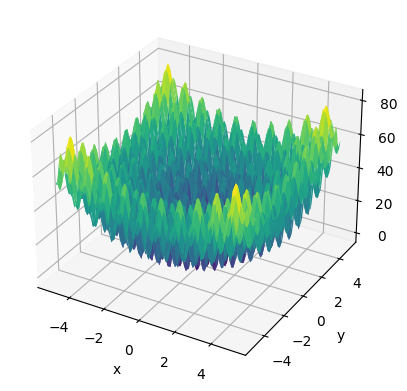

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Rastrigin function
def rastrigin(x):
    n = len(x)
    return 10*n + sum([xi**2 - 10*np.cos(2*np.pi*xi) for xi in x])

# Define the PSO algorithm
def pso(cost_func, dim=2, num_particles=30, max_iter=100, w=0.5, c1=1, c2=2):
    # Initialize particles and velocities
    particles = np.random.uniform(-5.12, 5.12, (num_particles, dim))
    velocities = np.zeros((num_particles, dim))

    # Initialize the best positions and fitness values
    best_positions = np.copy(particles)
    best_fitness = np.array([cost_func(p) for p in particles])
    swarm_best_position = best_positions[np.argmin(best_fitness)]
    swarm_best_fitness = np.min(best_fitness)

    # Iterate through the specified number of iterations, updating the velocity and position of each particle at each iteration
    for i in range(max_iter):
        # Update velocities
        r1 = np.random.uniform(0, 1, (num_particles, dim))
        r2 = np.random.uniform(0, 1, (num_particles, dim))
        velocities = w * velocities + c1 * r1 * (best_positions - particles) + c2 * r2 * (swarm_best_position - particles)

        # Update positions
        particles += velocities

        # Evaluate fitness of each particle
        fitness_values = np.array([cost_func(p) for p in particles])

        # Update best positions and fitness values
        improved_indices = np.where(fitness_values < best_fitness)
        best_positions[improved_indices] = particles[improved_indices]
        best_fitness[improved_indices] = fitness_values[improved_indices]
        if np.min(fitness_values) < swarm_best_fitness:
            swarm_best_position = particles[np.argmin(fitness_values)]
            swarm_best_fitness = np.min(fitness_values)

    # Return the best solution found by the PSO algorithm
    return swarm_best_position, swarm_best_fitness

# Define the dimensions of the problem
dim = 2

# Run the PSO algorithm on the Rastrigin function
solution, fitness = pso(rastrigin, dim=dim)

# Print the solution and fitness value
print('Solution:', solution)
print('Fitness:', fitness)

# Create a meshgrid for visualization
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin([X, Y])

# Create a 3D plot of the Rastrigin function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Plot the solution found by the PSO algorithm
ax.scatter(solution[0], solution[1], fitness, color='red')
plt.show()